# Simulated annealing, Energy of A Bitmap
 The goal is to minimalize energy of the bitmap, which is specified by 'black' points in the neibourhood of one 'black' point. The results are shown below. Again, simulated annealing is not meant to find best global result, but estimates the local minimum. The algorithm is opimized to calulate difference between points swap therefore, energy of whole bitmap is calculated once.
 Energy of points is sum of energies in the neibourhood or Euclidean distance between points in the neibourhood, depending on parameter function

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import matplotlib
from copy import deepcopy

num = 0


class Point:

    def __init__(self, x, y):
        self.x = x
        self.y = y



def generate_bitmap(width, height, density):
    return [[1 if random.random() < density else 0 for _ in range(width)]for _ in range(height)]


#energy is sum of enrgies in the neibourhood
def calculate_energy(bitmap, point, neighbourhood):
    if bitmap[point.x][point.y] == 0:
        return 0

    energy = 0
    for x, y in neighbourhood:
        if bitmap[(point.x+x)%len(bitmap)][(point.y+y)%len(bitmap[0])] == 1:
            energy += neighbourhood.get((x,y))

    return energy



#energy is Euclidean distance between points
def calculate_energy1(bitmap, point, neighbourhood):
    if bitmap[point.x][point.y] == 0:
        return 0

    def dist(p2): 
        return math.sqrt((point.x-p2.x)**2 + (point.y-p2.y)**2)

    energy = 0
    for x, y in neighbourhood:
        if bitmap[(point.x+x)%len(bitmap)][(point.y+y)%len(bitmap[0])] == 1:
            energy *= dist(Point((point.x+x)%len(bitmap), (point.y+y)%len(bitmap[0])))

    return energy


def calculate_bitmap_energy(bitmap, neighbourhood,func):
    bm_energy = 0
    for i, row in enumerate(bitmap):
        for j, col in enumerate(row):
            if col==1:
                point = Point(i,j)
                bm_energy += func(bitmap,point, neighbourhood)

    return bm_energy

def swap(bitmap, point1, point2):
    width, height = len(bitmap), len(bitmap[0])

    bitmap[point1.x%width][point1.y%height], bitmap[point2.x%width][point2.y%height] = \
        bitmap[point2.x%width][point2.y%height], bitmap[point1.x%width][point1.y%height]
    
def check_swap(bitmap, neighbourhood, func):

    width, height = len(bitmap), len(bitmap[0])

    def generate_random_points():
        while True:
            point1 = Point(random.randint(0,width-1), random.randint(0,height-1))
            point2 = Point(random.randint(0,width-1), random.randint(0,height-1))
            if point1.x != point2.x or point1.y != point2.y:
                return point1, point2


    point1, point2 = generate_random_points()

    energyOfPoints1 = func(bitmap, point1, neighbourhood) \
        + func(bitmap, point2, neighbourhood)

    swap(bitmap, point1, point2)

    energyOfPoints2 = func(bitmap, point1, neighbourhood) \
        + func(bitmap, point2, neighbourhood)

    swap(bitmap, point1, point2)

    if energyOfPoints2 < energyOfPoints1:
        return True, point1, point2, energyOfPoints2, energyOfPoints1
    return False, point1, point2, energyOfPoints2, energyOfPoints1


def probability(e1,e2, T):
    try:
        return math.exp(-(e2-e1) / T)
    except OverflowError:
        return 0.0
    except ZeroDivisionError:
        return math.exp(-(e2-e1) / 1)


def make_pic(cp,bitmap, width, height):

    fig = plt.figure(figsize=(22,22))
    fig.suptitle("size: " + str(width) + "/" + str(height), fontsize=22)


    cmap = matplotlib.cm.get_cmap("binary").copy()  
    cmap.set_bad(color='white')

    masked_array1 = np.ma.masked_where(cp == 0, cp)
    plt.subplot(221)
    plt.imshow(masked_array1, cmap = cmap)
    plt.title("before", fontsize=18)


    masked_array = np.ma.masked_where(bitmap == 0, bitmap)
    plt.subplot(222)
    plt.imshow(masked_array, cmap = cmap)
    plt.title("after", fontsize=18)
    global num
    num += 1
    plt.savefig('results_' + str(num), facecolor='white', edgecolor='none')

    plt.show()




def simulated_annealing(bitmap,neighbourhood,temperature, max_iterations= int(1e6),func = calculate_energy):
    
    width, height = len(bitmap), len(bitmap[0])

    cp = deepcopy(bitmap)
    bm_energy = calculate_bitmap_energy(bitmap, neighbourhood, func)

    for i in range(max_iterations):

        T = temperature(i)

        _ , point1, point2, energyAfterSwap, energyBeforeSwap = check_swap(bitmap, neighbourhood, func)

        if energyAfterSwap>energyBeforeSwap:
            
            if  random.random() <= probability(energyBeforeSwap,energyAfterSwap, T):
                bm_energy += (energyAfterSwap-energyBeforeSwap)
                swap(bitmap, point1, point2)
        elif energyAfterSwap < energyBeforeSwap:
            bm_energy += (energyAfterSwap-energyBeforeSwap)
            swap(bitmap, point1,point2)


    make_pic(cp, bitmap,width, height)



# Tests

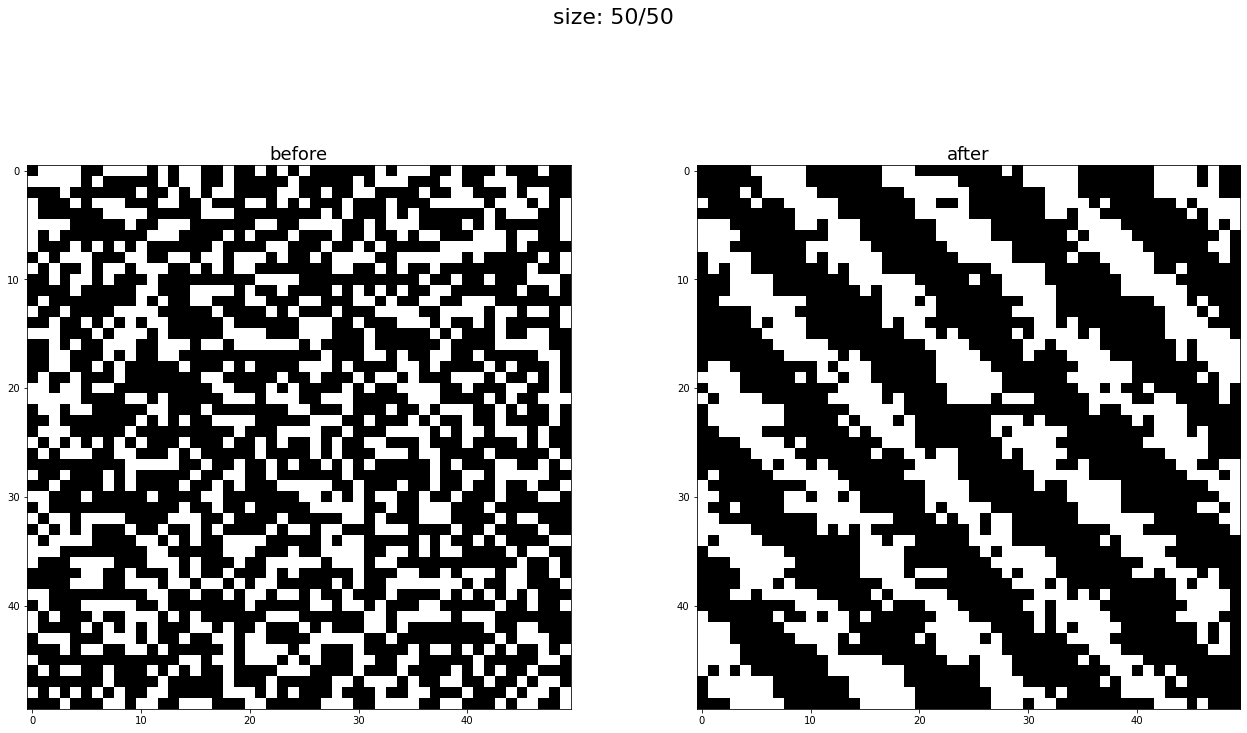

In [12]:
neighbourhood = {}
temperature = lambda i: 0.999**i
j = 15
height = 1
while j > 0:
    mid = j//2
    for i in range(-mid,mid+1,1):
        neighbourhood[(i,height)] = 1000
    height += 1
    j -= 2

bitmap = generate_bitmap(50,50, 0.6)
simulated_annealing(bitmap, neighbourhood, temperature,max_iterations=int(1.4e6))




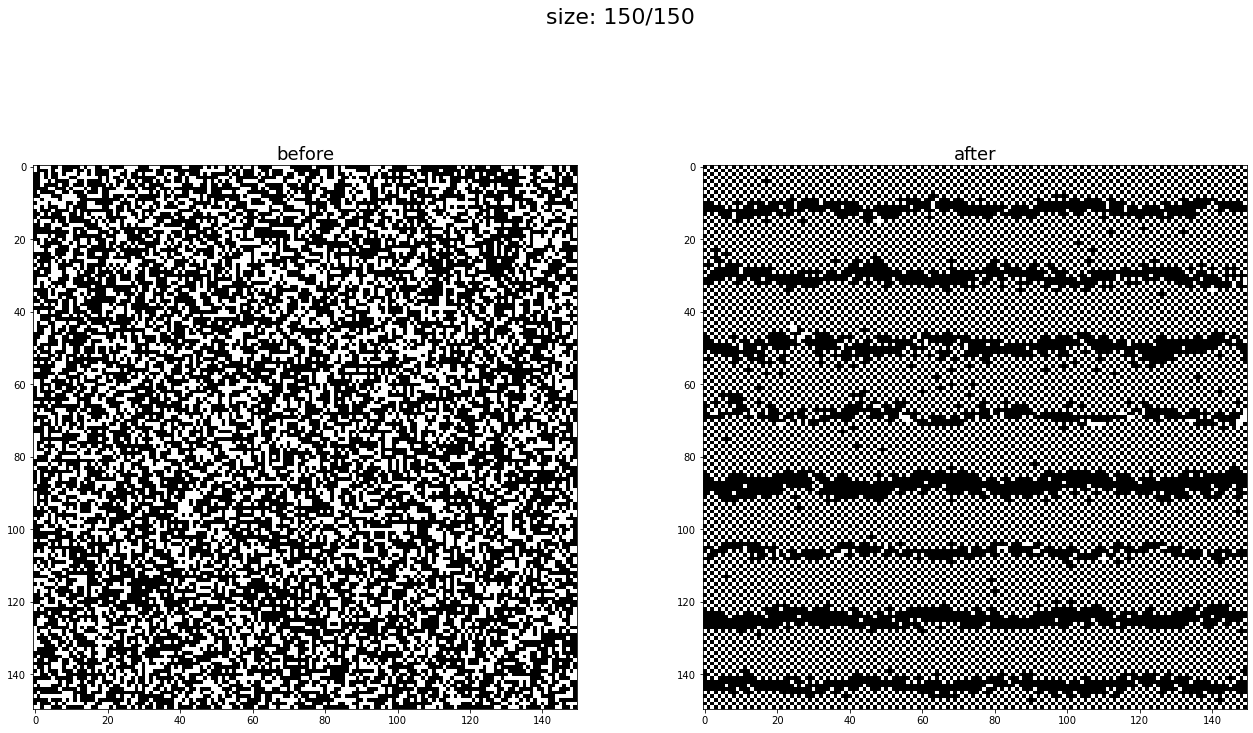

In [2]:
temperature = lambda i: 0.999**i


neighbourhood = {}

n = 25
for i in range(1,n):
    neighbourhood[(i,i)] = 100
    neighbourhood[(-i,i)] = 100
    neighbourhood[(-i,-i)] = 100
    neighbourhood[(i,-i)] = 100


bitmap = generate_bitmap(150,150, 0.6)
simulated_annealing(bitmap, neighbourhood, temperature)

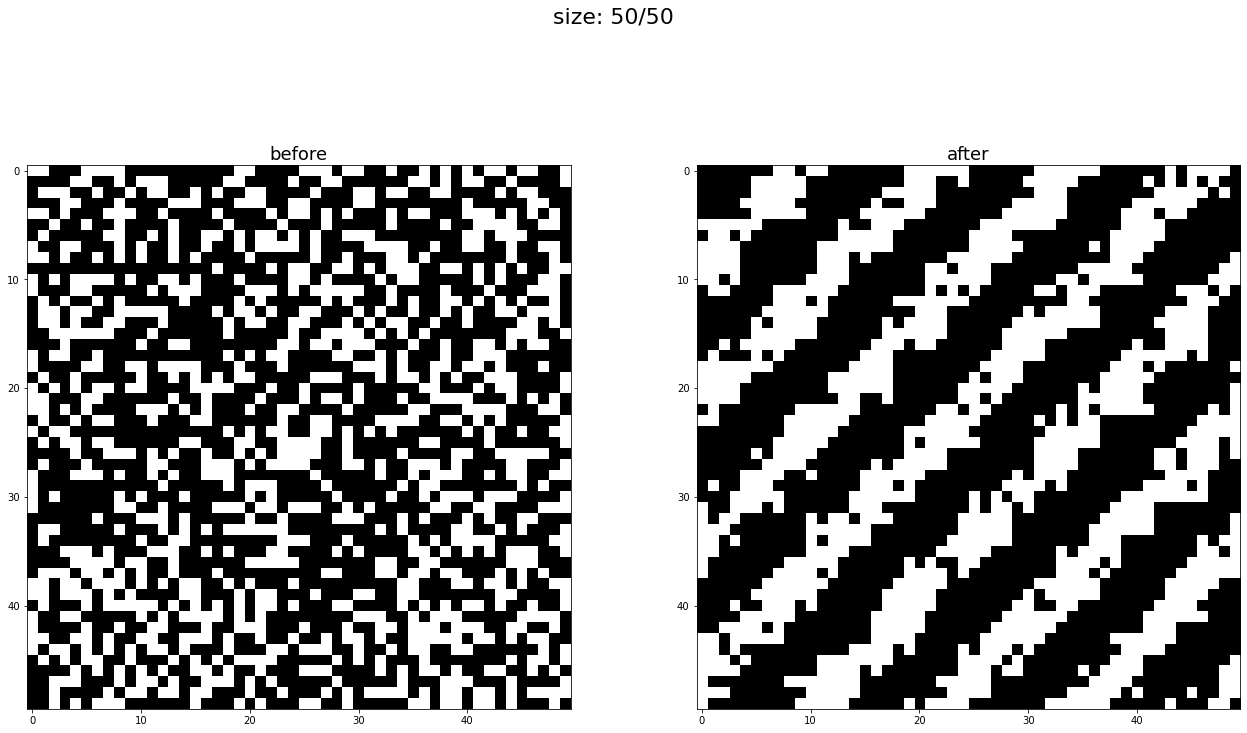

In [9]:
neighbourhood = {}
temperature = lambda i: 0.999**i
j = 15
height = 1
while j > 0:
    mid = j//2
    for i in range(-mid,mid+1,1):
        neighbourhood[(i,height)] = 1000
    height += 1
    j -= 2

bitmap = generate_bitmap(50,50, 0.6)
simulated_annealing(bitmap, neighbourhood, temperature,max_iterations=int(2e6))





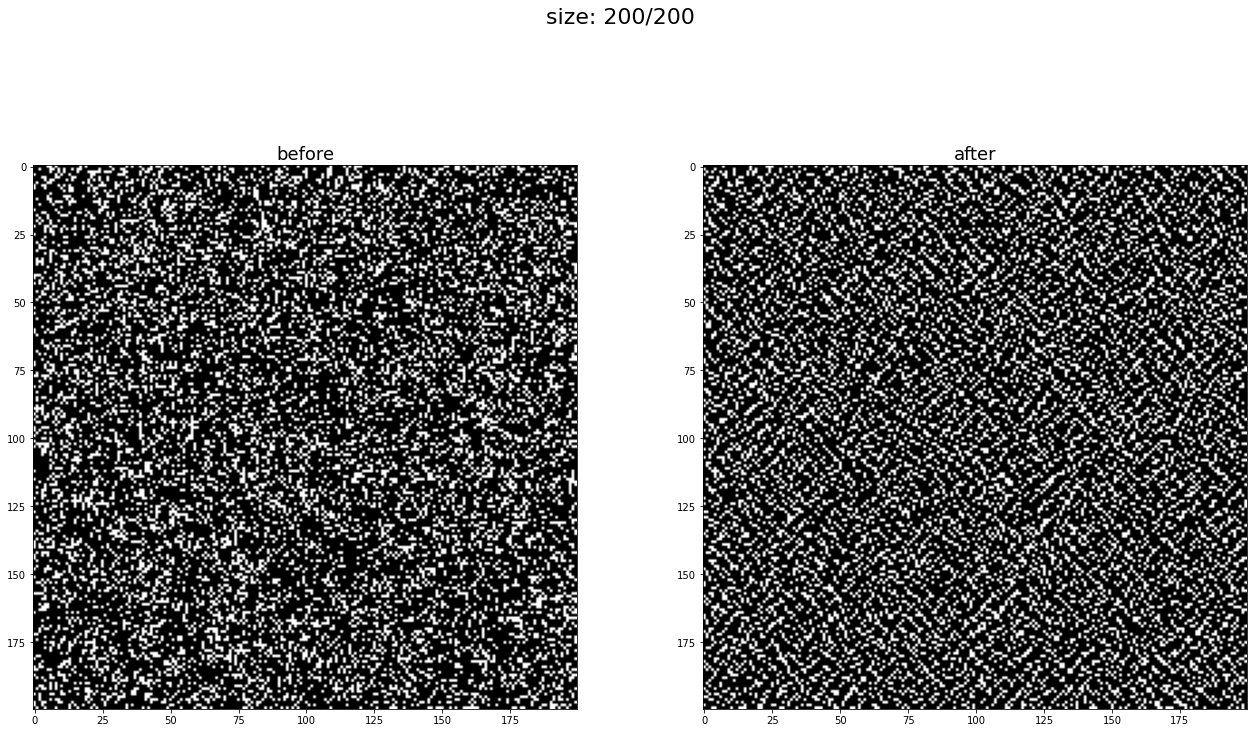

In [15]:
neighbourhood={(-1,0):1,
                (-2,0):1, 
                (-3,0):1, 
                (-4,0):1, 
                (1,0):1, 
                (2,0):1, 
                (3,0):1, 
                (4,0):1, 
                (0,1):1, 
                (0,2):1,
                (0,3):1, 
                (0,4):1, 
                (0,-1):1, 
                (0,-2):1, 
                (0,-3):1, 
                (0,-4): 1}

bitmap = generate_bitmap(200,200, 0.75)
temperature = lambda i: 0.999**i
simulated_annealing(bitmap, neighbourhood, temperature)


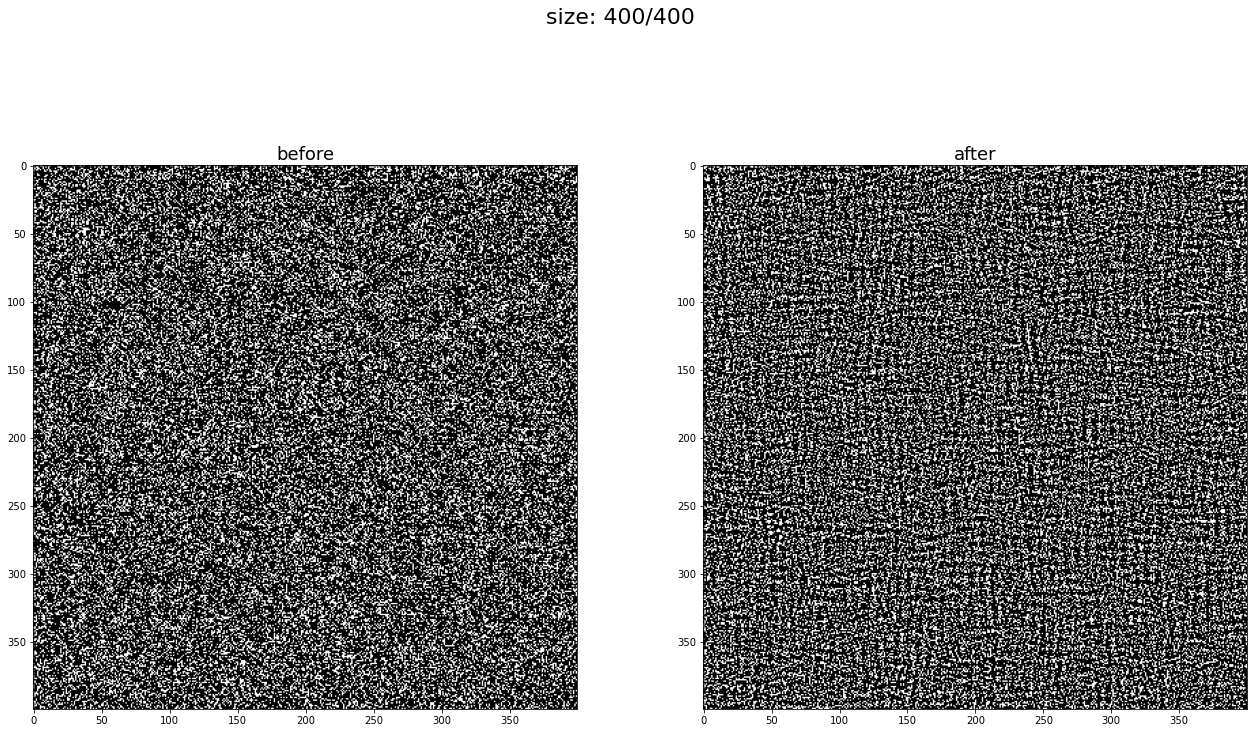

In [20]:
neighbourhood = {}

n = 6
for i in range(1,n):
    neighbourhood[(i,i)] = 1
    neighbourhood[(-i,i)] = 1
    neighbourhood[(-i,-i)] = 1
    neighbourhood[(i,-i)] = 1
    
bitmap = generate_bitmap(400,400, 0.7)
simulated_annealing(bitmap, neighbourhood, temperature,max_iterations=int(1e6))

In [ ]:
temperature = lambda i: 0.9**i
bitmap = generate_bitmap(150,150, 0.6)
simulated_annealing(bitmap, neighbourhood, temperature)

In [ ]:
temperature = lambda i: 0.999**i

bitmap = generate_bitmap(150,150, 0.6)
simulated_annealing(bitmap, neighbourhood, temperature, func=calculate_energy1)

In [ ]:
temperature: lambda x: 0.9**x

bitmap = generate_bitmap(50,50, 0.3)
simulated_annealing(bitmap, neighbourhood, temperature)

In [ ]:
temperature = lambda i: 0.999**i


neighbourhood = {}

n = 25
for i in range(1,n):
    neighbourhood[(i,i)] = 100
    neighbourhood[(-i,i)] = 100
    neighbourhood[(-i,-i)] = 100
    neighbourhood[(i,-i)] = 100
    
bitmap = generate_bitmap(50,50, 0.3)
simulated_annealing(bitmap, neighbourhood, temperature,func=calculate_energy1)

In [ ]:
neighbourhood = {}
temperature = lambda i: 0.999**i
j = 15
height = 1
while j > 0:
    mid = j//2
    for i in range(-mid,mid+1,1):
        neighbourhood[(i,height)] = 1000
    height += 1
    j -= 2

bitmap = generate_bitmap(50,50, 0.6)
simulated_annealing(bitmap, neighbourhood, temperature,max_iterations=int(1.4e6),func=calculate_energy1)

In [ ]:
neighbourhood = {}
temperature = lambda i: 0.999**i

n=20
for i in range(1,n):
    neighbourhood[(i+2,1)] = random.randint(0,1e4)
    
bitmap = generate_bitmap(320,320, 0.2)
simulated_annealing(bitmap, neighbourhood, temperature,max_iterations=int(1e6))

In [ ]:
bitmap = generate_bitmap(300,300, 0.25)
simulated_annealing(bitmap, neighbourhood, temperature,max_iterations=int(2e6))

In [ ]:

neighbourhood={(3,3): +2,    
        (-3,-3): +45,    
        (-2,-2): 34, 
        (-1,-1): +5,
        (1,1): 9,
        (2, 2): 43,
        (4,4): 44,
        (5,5):55,
        (6,6):24,
        (7,7):21,
        (-4,-4):21,
        (-5,-5):21,
        (-6,-6):11,
        (-7,-7):124}

bitmap = generate_bitmap(640,640, 0.7)
simulated_annealing(bitmap, neighbourhood, temperature)

In [ ]:
neighbourhood={(-1,0):1,
                (-1,1):1, 
                (-1,-1):1, 
                (0,1):1, 
                (0,-1):1, 
                (1,1):1, 
                (1,0):1, 
                (1,-1):1}

bitmap = generate_bitmap(200,200, 0.64)
temperature = lambda i: 0.999**i
simulated_annealing(bitmap, neighbourhood, temperature, max_iterations = int(2e6))

In [ ]:
bitmap = generate_bitmap(200,200, 0.2)
simulated_annealing(bitmap, neighbourhood, temperature)